In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/1021.JPG.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/3090.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/2072.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/5097.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/3013.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/3074.JPG.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/1089.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/1083.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/5071.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/5074.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/2096.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/2050.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/4065.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF BLOTCH/4027.jpg.jpeg
/kaggle/input/d-kap/APPLE_DISEASE_DATASET/LEAF B

Import Library

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2022-09-16 19:01:14.440668: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [3]:
li = os.listdir("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/")
image_list=[]

for i in li:
    for j in os.listdir("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i):
        image_list.append("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i+"/"+j)

In [4]:
len(image_list)

419

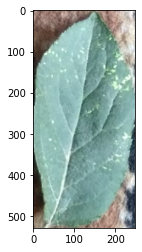

In [5]:
img0 = plt.imread(image_list[0])
plt.imshow(img0)

In [6]:
label = []
x = []
y = []

for i in li:
    label.append(i)
    for j in os.listdir("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i):
        image = cv2.imread("/kaggle/input/d-kap/APPLE_DISEASE_DATASET/"+i+"/"+j)
        image = cv2.resize(image,(300,300))
        x.append(image)
        y.append(i)
        
x = np.array(x)
y = np.array(y)

In [7]:
y_new = []
for i in y:
    y_new.append(label.index(i))
yc = y_new
yc = tf.keras.utils.to_categorical(yc)

In [8]:
x.shape, y.shape

((419, 300, 300, 3), (419,))

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test , y_train,y_test = train_test_split(x,yc,test_size=0.2)

In [10]:
x_train = x_train/255
x_test = x_test/255

In [11]:
data_augmention = keras.Sequential(
                [
                    layers.experimental.preprocessing.RandomContrast(0.5),
                    layers.experimental.preprocessing.RandomRotation(0.4),
                    layers.experimental.preprocessing.RandomZoom(0.3)
                ]
)

2022-09-16 19:01:23.876061: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-09-16 19:01:23.879120: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcuda.so.1
2022-09-16 19:01:23.959406: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:941] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-09-16 19:01:23.960699: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1720] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P100-PCIE-16GB computeCapability: 6.0
coreClock: 1.3285GHz coreCount: 56 deviceMemorySize: 15.90GiB deviceMemoryBandwidth: 681.88GiB/s
2022-09-16 19:01:23.960783: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
2022-09-16 19:01:23.993948: I tensorflow/stream_executor/platform/def

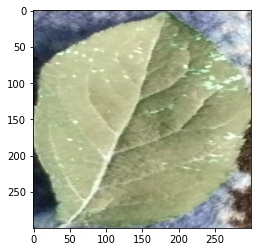

In [12]:
plt.imshow(x[0])

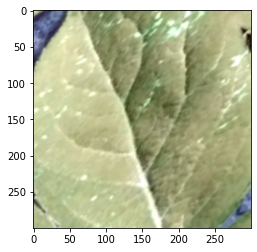

In [13]:
plt.imshow(data_augmention(x)[0].numpy().astype("uint8"))

In [14]:
x_train.shape

(335, 300, 300, 3)

In [15]:
model = Sequential([
    data_augmention,
    layers.Conv2D(16,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3,padding="same",activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(input_shape=(300,300,3)),
    layers.Dense(1000,activation="relu"),
    layers.Dense(250,activation="relu"),
    layers.Dense(50,activation="relu"),
    layers.Dense(4,activation="sigmoid"),
])

model.compile(optimizer="adam",
             loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True),
             metrics=["accuracy"])
model.fit(x_train,y_train,epochs=110)

2022-09-16 19:01:28.143022: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-09-16 19:01:28.154435: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2000150000 Hz


Epoch 1/110


2022-09-16 19:01:29.479220: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.11
2022-09-16 19:01:30.478321: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublasLt.so.11
2022-09-16 19:01:30.515620: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.8


11/11 [==============================] - 9s 78ms/step - loss: 1.6362 - accuracy: 0.3457
Epoch 2/110
11/11 [==============================] - 1s 61ms/step - loss: 1.3491 - accuracy: 0.4047
Epoch 3/110
11/11 [==============================] - 1s 57ms/step - loss: 1.3078 - accuracy: 0.3956
Epoch 4/110
11/11 [==============================] - 1s 52ms/step - loss: 1.2799 - accuracy: 0.3871
Epoch 5/110
11/11 [==============================] - 1s 52ms/step - loss: 1.1652 - accuracy: 0.4240
Epoch 6/110
11/11 [==============================] - 1s 53ms/step - loss: 1.2456 - accuracy: 0.4563
Epoch 7/110
11/11 [==============================] - 1s 51ms/step - loss: 1.1382 - accuracy: 0.4451
Epoch 8/110
11/11 [==============================] - 1s 51ms/step - loss: 1.1244 - accuracy: 0.4305
Epoch 9/110
11/11 [==============================] - 1s 51ms/step - loss: 1.1273 - accuracy: 0.4355
Epoch 10/110
11/11 [==============================] - 1s 50ms/step - loss: 1.1659 - accuracy: 0.4219
Epoch 11/11

In [16]:
model.evaluate(x_test,y_test)

3/3 [==============================] - 0s 78ms/step - loss: 1.2271 - accuracy: 0.4643


[1.2271391153335571, 0.4642857015132904]